In [1]:
import pandas as pd
import os 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Unir los datasets de cada mes en uno solo

In [3]:
#Test con Abril
#data= pd.read_csv("/content/Sales/Sales_April_2019.csv")
#data.head()

In [4]:
alldata= pd.DataFrame()

files = [file for file in os.listdir('/content/drive/MyDrive/Sales_Data')]

for file in files:
  df= pd.read_csv("/content/drive/MyDrive/Sales_Data/"+file)
  alldata= pd.concat([alldata,df])

alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
alldata.to_csv("alldata.csv", index=False)

## 2. Data cleaning

In [6]:
alldata.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
nans= alldata[(alldata.isnull()==True)]
nans

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
17656,NaN,NaN,NaN,NaN,NaN,NaN
17657,NaN,NaN,NaN,NaN,NaN,NaN
17658,NaN,NaN,NaN,NaN,NaN,NaN
17659,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
alldata.dropna(axis=0,inplace=True)

In [9]:
alldata.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
alldata.shape

(186305, 6)



---





- Convertir columnas al tipo adecuado

In [12]:
alldata=alldata[alldata["Quantity Ordered"]!='Quantity Ordered'] #Es necesario eliminar ciertos registros que tienen el nombre de las columnas en lugar de datos útiles

In [13]:
alldata["Quantity Ordered"] = pd.to_numeric(alldata['Quantity Ordered'])  #Int
alldata["Price Each"] = pd.to_numeric(alldata['Price Each'])  #Float

## 3. Manejo del dataset

- Creacion de la columna Mes para obtener información sobre las fechas

In [14]:
alldata.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [15]:
alldata["Month"] = alldata["Order Date"].str[0:2]
alldata["Month"] = alldata["Month"].astype('int32')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


In [ ]:
alldata[(alldata["Order Date"].str[0:2]=="Or")] #Ejecutar esta celda si no se dropearon las filas sin informacion
alldata= alldata[(alldata["Order Date"].str[0:2]!="Or")] #Ejecutar esta celda si no se dropearon las filas sin informacion

In [18]:
alldata["Month"] = alldata["Order Date"].str[0:2]
alldata["Month"] = alldata["Month"].astype('int32')
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


- Creación de la columna de Sales para responder a las preguntas futuras sobre ventas

In [19]:
alldata["Sales"]= alldata["Quantity Ordered"] * alldata["Price Each"]
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


- Creación de la columna Ciudad

In [20]:
#Usamos el metodo .apply() que nos permite usar una funcion en toda una columna
def obtenerCiudad(adress):
  return adress.split(",")[1]

def obtenerEstado(adress):
  return adress.split(",")[2].split(" ")[1]


alldata["City"] = alldata['Purchase Address'].apply(lambda x: obtenerCiudad(x)+" "+obtenerEstado(x)) #El uno es agarra el elemento 1 de las comas
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


## 3. Pregunta: ¿Cuál fue el mejor mes para las ventas y cuánto gane?

In [21]:
alldata.groupby("Month").sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Respuesta: **Diciembre**, ¿se debe a las fiestas?

In [22]:
alldata.groupby("Month").sum()["Sales"]

Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 

Text(0.5, 0, 'Months')

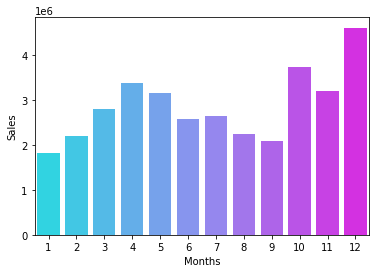

In [25]:
months= list(range(1,13))
sns.barplot(x=months,y="Sales",data=alldata.groupby("Month").sum(),palette="cool")
plt.xlabel("Months")

## 4. Pregunta: ¿Qué ciudad de US tuvo la mayor cantidad de ventas?

In [26]:
alldata.groupby("City").sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


Text(0.5, 0, 'Cities')

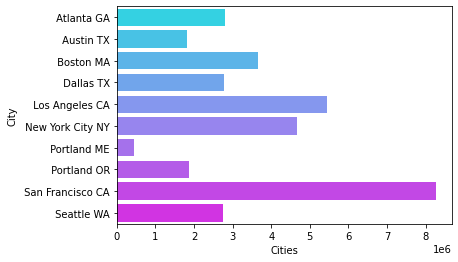

In [27]:
cities= alldata.groupby("City").sum()["Sales"].keys()
sns.barplot(x="Sales",y=cities,data=alldata.groupby("City").sum(),palette="cool", orient="h")
plt.xlabel("Cities")

## 5. Pregunta: ¿En qué horario deberíamos desplegar publicidad para maximizar las posibilidades de una compra de un cliente?

In [28]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [29]:
alldata['Order Date']= pd.to_datetime(alldata['Order Date'])

In [30]:
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


In [31]:
alldata["hour"]= alldata['Order Date'].dt.hour
alldata.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11


In [32]:
alldata.groupby("hour").count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [33]:
alldata.groupby("hour").count().keys()

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City'],
      dtype='object')

Text(0, 0.5, 'Numbers of Orders')

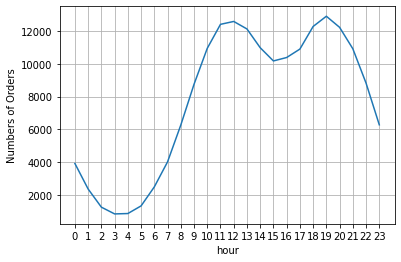

In [34]:
hours=alldata.groupby("hour").count()["Order ID"].keys()
sns.lineplot(x=hours,y=alldata.groupby("hour").count()['Order ID'])
plt.grid()
plt.xticks(hours)
plt.ylabel("Numbers of Orders")

Respuesta: **Entre las 11 y las 19 podriamos desplegar publicdad para que el cliente se decida finalmente a comprar e incentivar a otros compradores**

## 6. ¿Qué productos suelen ser vendidos juntos?*

In [42]:
df = alldata[alldata['Order ID'].duplicated(keep=False)] #Check ID duplicate columns

In [43]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin TX,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin TX,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles CA,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles CA,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City NY,11


In [44]:
 df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x:  ','.join(x) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin TX,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.99,Austin TX,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles CA,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,11.52,Los Angeles CA,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City NY,11,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...
17520,295526,27in FHD Monitor,1,149.99,2019-11-21 11:26:00,"550 Park St, Dallas, TX 75001",11,149.99,Dallas TX,11,"Apple Airpods Headphones,27in FHD Monitor"
17528,295534,Google Phone,1,600.00,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,600.00,Boston MA,19,"Google Phone,USB-C Charging Cable"
17529,295534,USB-C Charging Cable,1,11.95,2019-11-06 19:21:00,"22 Pine St, Boston, MA 02215",11,11.95,Boston MA,19,"Google Phone,USB-C Charging Cable"
17594,295599,iPhone,1,700.00,2019-11-25 21:17:00,"258 Ridge St, New York City, NY 10001",11,700.00,New York City NY,21,"iPhone,Apple Airpods Headphones"


In [46]:
#Eliminar pares iguales
df= df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [52]:
  from itertools import combinations
  from collections import Counter

  count=Counter()

  for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2))) #ese 2 es para dos articulos que se venden juntos, puede ser 3

  for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Esta información nos puede servir para crear promociones y ofertas**

## 7. ¿Qué productos se vendieron más?

In [65]:
products= alldata.groupby('Product').sum()

In [70]:
products['Quantity Ordered']

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

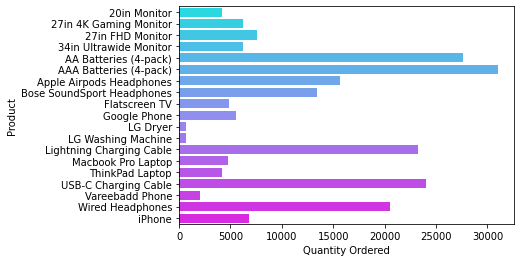

In [71]:
sns.barplot(x=products["Quantity Ordered"],y=products["Quantity Ordered"].keys(),palette="cool", orient="h")

In [74]:
prices= alldata.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

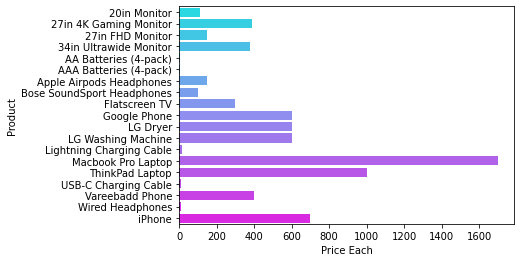

In [76]:
sns.barplot(x=prices,y=prices.keys(),palette="cool", orient="h")

Cuanto más barato, más demanda hay, pero en casos como Macbooks sigue habiendo demanda porque es un producto popular que se compra con frecuencia.